In [1]:
import sys
import numpy as np
import pandas as pd 
import math
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


df = pd.read_csv("currency.csv")

getting data from the csv file.

In [2]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
columns = ['variance','curtosis','skewness','entropy']
for column in columns:
    df[column] = (df[column] - df[column].min() ) / (df[column].max() - df[column].min())
    
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.539114,0.587301,0.287924,0.668917,0.444606
std,0.205003,0.219611,0.185669,0.191041,0.497103
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379977,0.451451,0.159869,0.557821,0.000000
50%,0.543617,0.602168,0.254280,0.723929,0.000000
75%,0.711304,0.770363,0.364674,0.813171,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


min-max normalization.

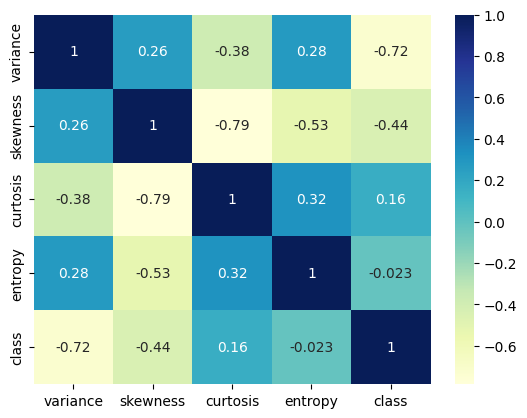

In [4]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
plt.show()

plotting the correlation heatmap for analysis.

In [5]:
print(df['variance'].std())
print(df['variance'].mean())

0.20500346770212244
0.5391136632607123


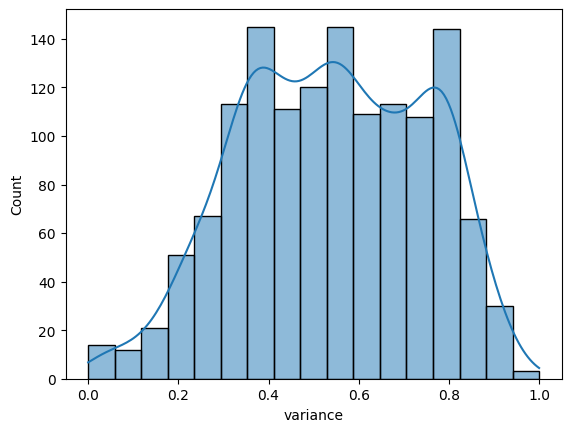

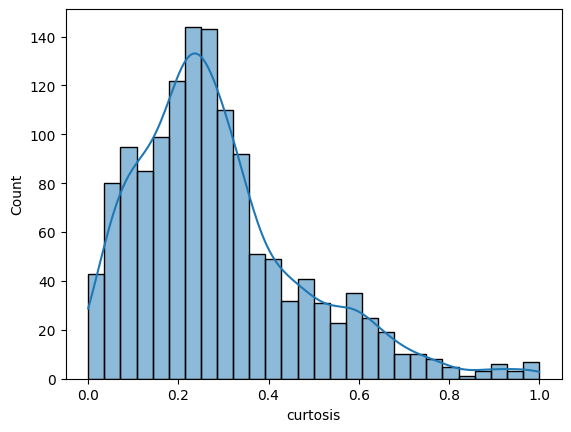

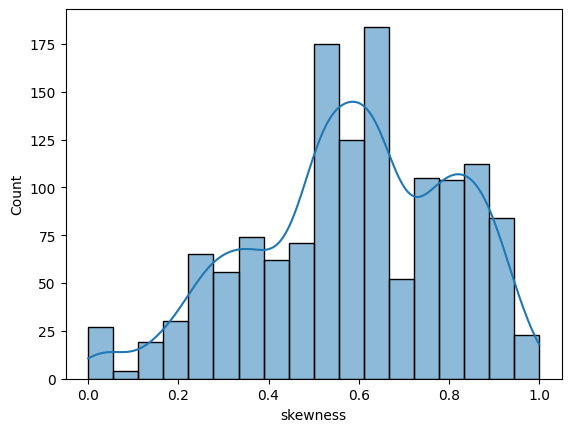

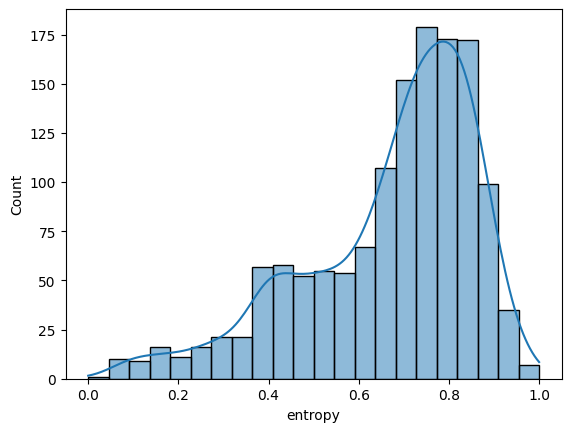

In [6]:
res = sns.histplot(x='variance',data=df, kde=True)
plt.show()

res = sns.histplot(x='curtosis',data=df, kde=True)
plt.show()

res = sns.histplot(x='skewness',data=df, kde=True)
plt.show()

res = sns.histplot(x='entropy',data=df, kde=True)
plt.show()

plotting the distribution curves of all the 4 parameters.

In [7]:
df = df.sample(frac=1)

n_train = math.floor(0.8 * df.shape[0])
n_test = math.ceil((1-0.8) * df.shape[0])
X_train = df[:n_train]
y_train = df[:n_train]
X_test = df[n_train:]
y_test = df[n_train:]

train-test splitting with shuffling of the data.

In [8]:
#X_train=X_train.drop(columns="class")
X_test=X_test.drop(columns="class")

#y_train=y_train.drop(columns="variance")
#y_train=y_train.drop(columns="skewness")
#y_train=y_train.drop(columns="curtosis")
#y_train=y_train.drop(columns="entropy")
y_test=y_test.drop(columns="variance")
y_test=y_test.drop(columns="skewness")
y_test=y_test.drop(columns="curtosis")
y_test=y_test.drop(columns="entropy")


storing_predictions = y_test
#y_test



dropping unnecessary columns to make it easier.

In [9]:
X_test=X_test.to_numpy().astype(np.float64)
storing_predictions = storing_predictions.to_numpy().astype(np.float64)
y_test = y_test.to_numpy().astype(np.float64)

m,n = y_test.shape

foraucroc = y_test
#y_test

Converting matrix to numpy array.

In [10]:
class0_train = X_train[X_train['class'] < 1]
class1_train = X_train[X_train['class'] > 0]

class0_train = class0_train.drop(columns="class")
class1_train = class1_train.drop(columns="class")

class0rows, class0columns = class0_train.shape
class1rows, class1columns = class1_train.shape

mu_class0_feature1 = class0_train['variance'].mean()
mu_class0_feature2 = class0_train['skewness'].mean()
mu_class0_feature3 = class0_train['curtosis'].mean()
mu_class0_feature4 = class0_train['entropy'].mean()

sigma_class0_feature1 = class0_train['variance'].std()
sigma_class0_feature2 = class0_train['skewness'].std()
sigma_class0_feature3 = class0_train['curtosis'].std()
sigma_class0_feature4 = class0_train['entropy'].std()

mu_class1_feature1 = class1_train['variance'].mean()
mu_class1_feature2 = class1_train['skewness'].mean()
mu_class1_feature3 = class1_train['curtosis'].mean()
mu_class1_feature4 = class1_train['entropy'].mean()

sigma_class1_feature1 = class1_train['variance'].std()
sigma_class1_feature2 = class1_train['skewness'].std()
sigma_class1_feature3 = class1_train['curtosis'].std()
sigma_class1_feature4 = class1_train['entropy'].std()



Now we are dividing the train data into 2 parts for the 2 Gaussians.
And we are storing the Mu and Sigma of all the 4 features for the class 0 and class 1 both, resulting in total of 16 values.

In [11]:
print(m)

275


In [12]:
for i in range(m) :
    
    likeihood_class0 = np.exp( (-(X_test[i][0] - mu_class0_feature1)*(X_test[i][0] - mu_class0_feature1)) / (2*sigma_class0_feature1*sigma_class0_feature1) ) / (sigma_class0_feature1*math.sqrt(2*math.pi))
    likeihood_class1 = np.exp( (-(X_test[i][0] - mu_class1_feature1)*(X_test[i][0] - mu_class1_feature1)) / (2*sigma_class1_feature1*sigma_class1_feature1) ) / (sigma_class1_feature1*math.sqrt(2*math.pi))
    
    prior_class0 = class0rows / (class0rows + class1rows)
    prior_class1 = class1rows / (class0rows + class1rows)
    
    storing_predictions[i][0] = 1
    
    if likeihood_class0*prior_class0 >= likeihood_class1*prior_class1 :
        storing_predictions[i][0] = 0
        
    foraucroc[i][0] = likeihood_class1*prior_class1 / ((likeihood_class1*prior_class1) + (likeihood_class0*prior_class0)  )
    
        
    

Now we are implementing the Bayes theorem and also, calculating the numerator of the posterior probability by calculating the likelihood and prior probability.
Comparing the product of the likelihood and prior probability of class 0 with that of class 1 and whichever is higher, the data point has gets that class label.

In [13]:
foraucroc
foraucroc = np.round(foraucroc)
# storing_predictions
#y_test


In [14]:
storing_predictions.shape

(275, 1)

In [15]:
final_rows, final_columns = y_test.shape


In [16]:
true_positives = np.matmul(np.transpose(storing_predictions),y_test)
precision_deno = np.matmul(np.transpose(storing_predictions),storing_predictions)

recall_deno = np.matmul(np.transpose(y_test),y_test)

finalf1 = 2*(true_positives/precision_deno)*(true_positives/recall_deno) / ((true_positives/precision_deno) + (true_positives/recall_deno) )

print("The F1 score is :-")
print(finalf1)

The F1 score is :-
[[0.94348114]]


Implementing F1 score from scratch.

In [17]:
print("The accuracy score is :-")
acc_score_nume = final_rows - (recall_deno + precision_deno - (2*true_positives) )
acc_score_deno = final_rows
print(acc_score_nume / acc_score_deno)

The accuracy score is :-
[[0.9545975]]
